# Working out a classification prediction

## Machine learning to predict heart disease

Data is gotten from kaggle https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

Model used is Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
data = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### The data looks clean, no-null values

In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
data.AgeCategory.nunique()

13

## Is race relevant to the prediction? Let's find out

In [7]:
Crosstab = pd.crosstab(index = data['Race'], columns = data['HeartDisease'])
Crosstab

HeartDisease,No,Yes
Race,,
American Indian/Alaskan Native,4660,542
Asian,7802,266
Black,21210,1729
Hispanic,26003,1443
Other,10042,886
White,222705,22507


In [8]:
from scipy.stats import chi2_contingency

In [9]:
racecorr = chi2_contingency(Crosstab)
print(racecorr[1])

2.9886131565632597e-180


In [10]:
data.shape

(319795, 18)

## Age category and General health are ordinal. Therefore, let's label encode

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
la = LabelEncoder()
data['AgeCategory'] = la.fit_transform(data['AgeCategory'])
data['GenHealth'] = la.fit_transform(data['GenHealth'])
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,7,White,Yes,Yes,4,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,White,No,Yes,4,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,9,White,Yes,Yes,1,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,11,White,No,No,2,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,4,White,No,Yes,4,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,8,Hispanic,Yes,No,1,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,3,Hispanic,No,Yes,4,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,5,Hispanic,No,Yes,2,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,1,Hispanic,No,No,2,12.0,No,No,No


# Exploratory Data Analysis

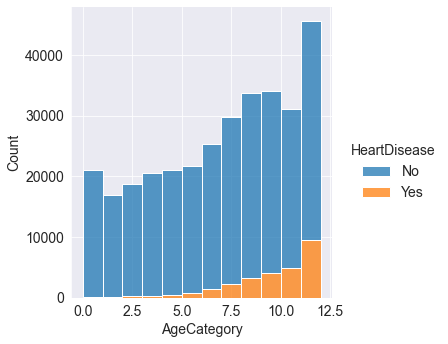

In [13]:
sns.displot(data, x="AgeCategory", hue="HeartDisease", bins=[0,1,2,3,4,5,6,7,8,9,10,11,12], multiple="stack")
# Increase in age looks proportional to Heart disease.

<AxesSubplot:>

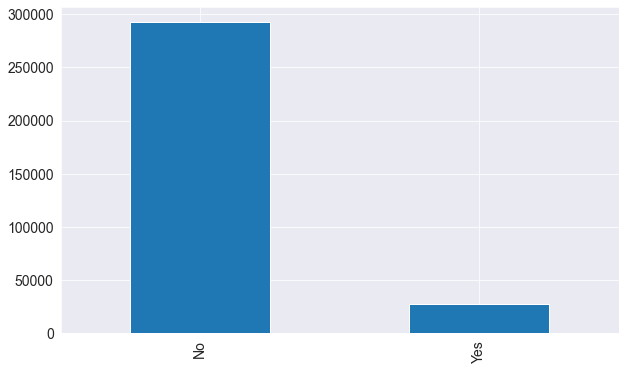

In [14]:
data.HeartDisease.value_counts().plot.bar()

# Data split
## The data is split into train, validation and test.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_val_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2, random_state=42)

In [18]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (204668, 18)
val_df.shape : (51168, 18)
test_df.shape : (63959, 18)


## Identifying Input and target columns

In [19]:
input_cols = list(train_df.columns)[1:]
target_col = 'HeartDisease'

In [20]:
print(input_cols)

['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [21]:
len(input_cols)

17

In [22]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

## Identifying numeric and categorical columns

In [23]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [24]:
train_inputs[categorical_cols].nunique()

Smoking             2
AlcoholDrinking     2
Stroke              2
DiffWalking         2
Sex                 2
Race                6
Diabetic            4
PhysicalActivity    2
Asthma              2
KidneyDisease       2
SkinCancer          2
dtype: int64

In [25]:
train_inputs.Diabetic.unique()

array(['Yes (during pregnancy)', 'No', 'No, borderline diabetes', 'Yes'],
      dtype=object)

## Scaling numeric columns

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(data[numeric_cols])

MinMaxScaler()

In [29]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [30]:
train_inputs[numeric_cols].describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime
count,204668.000000,204668.000000,204668.000000,204668.000000,204668.000000,204668.000000
mean,0.196898,0.111693,0.129619,0.543025,0.555728,0.265011
std,0.076757,0.263931,0.264862,0.296790,0.383821,0.062339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144996,0.000000,0.000000,0.333333,0.250000,0.217391
50%,0.184957,0.000000,0.000000,0.583333,0.500000,0.260870
75%,0.234215,0.066667,0.100000,0.750000,1.000000,0.304348
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
train_inputs

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
133867,0.152843,No,No,No,0.000000,0.000000,No,Female,0.583333,White,Yes (during pregnancy),Yes,0.50,0.260870,No,No,No
66990,0.208499,No,No,No,0.100000,0.000000,Yes,Female,0.750000,Asian,No,Yes,0.25,0.304348,Yes,No,No
266009,0.856936,Yes,Yes,No,0.000000,0.000000,No,Male,0.250000,Other,No,Yes,0.00,0.217391,No,No,No
286529,0.155378,Yes,No,No,0.000000,0.000000,No,Female,0.416667,White,No,Yes,1.00,0.217391,Yes,No,No
267161,0.192684,No,No,No,0.233333,1.000000,No,Female,0.083333,Black,No,No,0.25,0.260870,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303013,0.149583,No,No,No,0.000000,0.000000,No,Female,0.916667,White,No,Yes,0.00,0.391304,No,No,No
279613,0.192442,Yes,No,No,0.000000,0.000000,No,Female,0.500000,White,No,No,0.50,0.173913,No,No,No
139081,0.283593,No,No,No,0.066667,0.000000,No,Male,0.583333,White,No,No,0.25,0.304348,No,No,No
119308,0.215381,No,No,No,0.000000,0.200000,No,Female,0.000000,Black,No,No,1.00,0.217391,No,No,No


## Encoding Categorical Features

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [34]:
encoder.fit(data[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [35]:
encoder.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic',
        'Other', 'White'], dtype=object),
 array(['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [36]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [37]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [38]:
train_input = train_inputs[numeric_cols + encoded_cols]
val_input = val_inputs[numeric_cols + encoded_cols]
test_input = test_inputs[numeric_cols + encoded_cols]

In [39]:
val_input

,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_No,PhysicalActivity_Yes,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
167018,0.183025,0.066667,0.933333,0.000000,0.5,0.260870,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
14318,0.201376,0.000000,0.000000,0.666667,0.0,0.304348,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
228294,0.414343,0.000000,0.000000,0.666667,0.5,0.304348,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
25428,0.170590,0.000000,0.000000,0.000000,1.0,0.347826,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
12295,0.128577,0.000000,0.333333,0.583333,0.0,0.260870,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164830,0.175299,0.000000,0.000000,1.000000,0.5,0.217391,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
103578,0.171435,0.000000,0.000000,0.333333,0.5,0.304348,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2041,0.196185,0.100000,0.000000,0.166667,1.0,0.217391,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
304500,0.141615,0.000000,0.233333,0.166667,1.0,0.304348,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


# Logistic Regression Model and prediction

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver='liblinear')

In [42]:
model.fit(train_input, train_targets)

LogisticRegression(solver='liblinear')

In [43]:
train_preds = model.predict(train_input)

In [44]:
train_probs = model.predict_proba(train_input)
train_probs

array([[0.97502101, 0.02497899],
       [0.94496202, 0.05503798],
       [0.96248398, 0.03751602],
       ...,
       [0.94546412, 0.05453588],
       [0.99706814, 0.00293186],
       [0.99283788, 0.00716212]])

## Test for accuracy

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(train_targets, train_preds)

0.9161910997322493

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cf = confusion_matrix(train_targets, train_preds, normalize='true')
cf

array([[0.99230773, 0.00769227],
       [0.90626983, 0.09373017]])

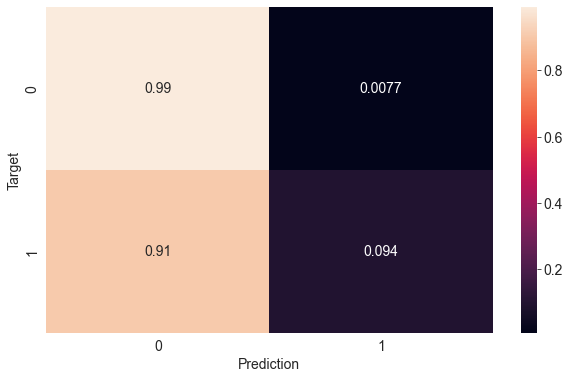

In [49]:
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target');

## Function to check the accuracy of the model

In [50]:
def predict_and_plot(input, target, name=''):
    pred = model.predict(input)
    
    accuracy = accuracy_score(target, pred)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(target, pred, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return pred

Accuracy: 91.35%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

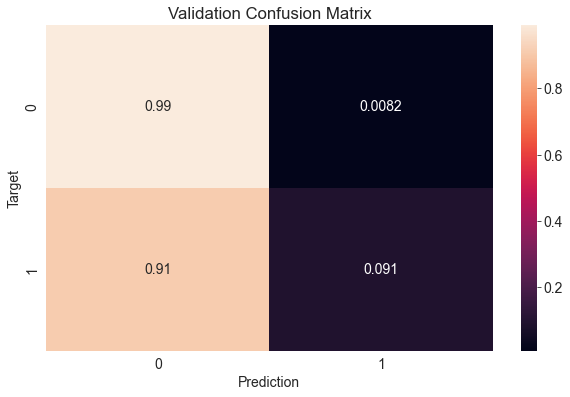

In [51]:
predict_and_plot(val_input, val_targets, name='Validation')

Accuracy: 91.30%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

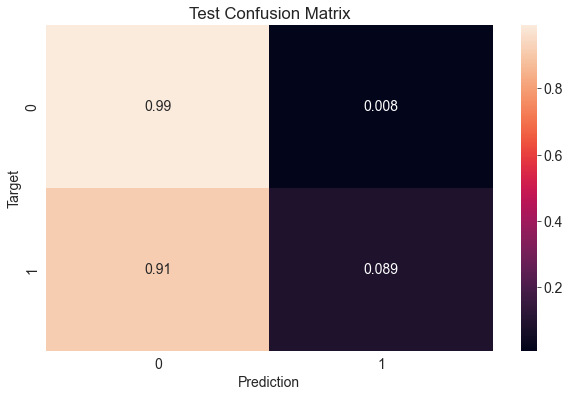

In [52]:
predict_and_plot(test_input, test_targets, name='Test')